<a href="https://colab.research.google.com/github/Mogreine29/HandsOnAI_2/blob/main/ModelTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from keras_preprocessing import text,sequence
from tensorflow import keras
import pickle
import pandas as pd
import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Skip this if Drive not needed

In [47]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/Challenge2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Challenge2'
/content/drive/.shortcut-targets-by-id/1aIAK0Qi-pofkSLi3xijkAex-JrSW_tn8/Challenge2


Load a model here

In [48]:
path_to_load = '/content/drive/MyDrive/Challenge2/model16.h5'
tokenizer_path = 'tokenizer.pickle'

In [49]:
with open(tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

In [50]:
model = keras.models.load_model(path_to_load)

Reading data for testing

In [51]:
df_test = pd.read_csv('/content/drive/MyDrive/Challenge2/fake_test.csv')
df_test = df_test.drop(['Unnamed: 0', 'target_name'], axis = 1)

In [52]:
STOPWORDS = set(stopwords.words('french'))
moreStopwords = ['plus', 'comme', 'a', 'il', 'alors','au',
'aucuns','aussi','autre','avant','avec','avoir','bon','car','ce','cela','ces','ceux','chaque','ci',
'comme','comment','dans','des','du','dedans','dehors','depuis','devrait','doit','donc','dos','début',
'elle','elles','en','encore','essai','est','et','eu','fait','faites','fois','font','hors','ici','il',
'ils','je',	'juste','la','le','les','leur','là','ma','maintenant','mais','mes','mien','moins','mon',
'mot','même','ni','nommés','notre','nous','ou','où','par','parce','pas','peut','peu','plupart','pour',
'pourquoi','quand','que','quel','quelle','quelles','quels','qui','sa','sans','ses','seulement','si',
'sien','son','sont','sous','soyez',	'sujet','sur','ta','tandis','tellement','tels','tes','ton','tous',
'tout','trop','très','tu','voient','vont','votre','vous','vu','ça','étaient','état','étions','été','être']

STOPWORDS.update(moreStopwords)
def cleaner(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    text = ' '.join(word for word in text.split() if word not in STOPWORDS)   
    return text

df_test['data'] = df_test['data'].apply(cleaner)

In [53]:
x_test = df_test["data"]
y_test = df_test["label"]

In [54]:
max_features = 10000
maxlen = 512
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [55]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

16/16 [==============================] - 5s 307ms/step - loss: 2.0507 - accuracy: 0.6872
Accuracy of the model on Testing Data is -  68.72428059577942 %


In [56]:
pred = model.predict(X_test)

16/16 [==============================] - 6s 303ms/step


In [57]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
print(classification_report(list(y_test), np.round(pred).astype(int), target_names = ['Not Fake','Fake']))

              precision    recall  f1-score   support

    Not Fake       0.71      0.74      0.73       272
        Fake       0.65      0.62      0.64       214

    accuracy                           0.69       486
   macro avg       0.68      0.68      0.68       486
weighted avg       0.69      0.69      0.69       486



In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,np.round(pred).astype(int))
cm
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

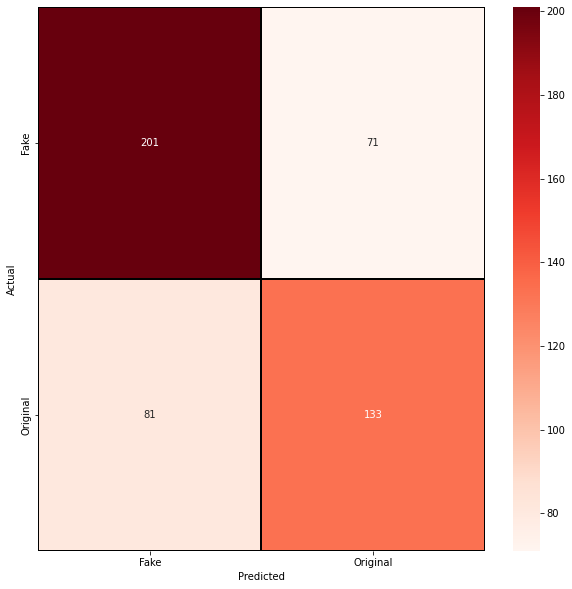

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")